> # **Práctica 2: Clasificación** 

Autores: Alejandro Barreiro Morante y Adrián Alcalá Gutiérrez

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from seaborn import pairplot
import sklearn
from sklearn import metrics
import sklearn.compose
import pydotplus

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

train = pd.read_csv("https://raw.githubusercontent.com/alejandro-bmorante-alumnos-upm-es/practica2ML/master/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/alejandro-bmorante-alumnos-upm-es/practica2ML/master/test.csv")

pd.set_option('display.max_columns', None) #Para que nos muestre todas las columnas

train['round_winner']= sklearn.preprocessing.OneHotEncoder(drop="first").fit_transform(train.loc[:,["round_winner"]]).toarray()
train['round_winner.1']= sklearn.preprocessing.OneHotEncoder(drop="first").fit_transform(train.loc[:,["round_winner.1"]]).toarray()
train

time_left  ct_score  t_score         map  bomb_planted  ct_health  \
0         175.00      10.0     12.0  de_vertigo         False      500.0   
1         108.16       7.0      8.0    de_train         False      500.0   
2          26.15       0.0      1.0    de_train          True       75.0   
3         174.87      14.0      2.0     de_nuke         False      500.0   
4         174.95       8.0     12.0   de_mirage         False      500.0   
...          ...       ...      ...         ...           ...        ...   
73441     114.93       5.0     12.0  de_inferno         False      500.0   
73442     174.93       3.0      2.0    de_train         False      500.0   
73443     114.93      13.0      8.0     de_nuke         False      500.0   
73444     114.90      12.0     14.0   de_mirage         False      500.0   
73445      89.87      20.0     19.0    de_train         False      402.0   

       t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
0         500.0     500.0     85.0    6550.0  16850.0         5.0        1.0   
1         500.0     300.0    300.0     450.0    650.0         0.0        0.0   
2         295.0      93.0    298.0     350.0   2300.0         0.0        3.0   
3         500.0     190.0      0.0   19900.0  15000.0         0.0        0.0   
4         500.0       0.0    483.0   26350.0  28850.0         0.0        5.0   
...         ...       ...      ...       ...      ...         ...        ...   
73441     500.0     288.0    441.0   11800.0  10450.0         2.0        5.0   
73442     500.0     177.0    398.0   24000.0  19300.0         2.0        4.0   
73443     500.0     422.0    500.0   16900.0   1500.0         5.0        5.0   
73444     500.0     500.0    500.0   23600.0  10150.0         5.0        1.0   
73445     372.0     492.0    391.0   48250.0  42050.0         4.0        4.0   

       ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  \
0                 3.0               5.0              5.0             1.0   
1                 0.0               5.0              5.0             0.0   
2                 0.0               1.0              3.0             0.0   
3                 1.0               5.0              5.0             0.0   
4                 0.0               5.0              5.0             0.0   
...               ...               ...              ...             ...   
73441             1.0               5.0              5.0             0.0   
73442             2.0               5.0              5.0             0.0   
73443             5.0               5.0              5.0             1.0   
73444             5.0               5.0              5.0             0.0   
73445             4.0               5.0              4.0             0.0   

       t_weapon_ak47  ct_weapon_aug  t_weapon_aug  ct_weapon_awp  \
0                0.0            0.0           0.0            0.0   
1                0.0            0.0           0.0            0.0   
2                1.0            0.0           0.0            0.0   
3                0.0            0.0           0.0            0.0   
4                1.0            0.0           0.0            0.0   
...              ...            ...           ...            ...   
73441            1.0            0.0           0.0            0.0   
73442            2.0            0.0           0.0            1.0   
73443            1.0            0.0           0.0            1.0   
73444            0.0            0.0           0.0            4.0   
73445            2.0            0.0           0.0            2.0   

       t_weapon_awp  ct_weapon_bizon  t_weapon_bizon  ct_weapon_cz75auto  \
0               0.0              0.0             0.0                 0.0   
1               0.0              0.0             0.0                 0.0   
2               0.0              0.0             0.0                 0.0   
3               0.0              0.0             0.0                 0.0   
4               0.0    

Para minimizar las transformaciones en variables como bomb_planted o time_left(las cuales explicaremos más adelante) para que nuestro modelo aprenda correctamente, decidimos asignar a CT el valor 0 y a T el valor 1. 

**CT=0 ; T=1**



>#  **Analisis de los datos**



## Gráficas

Gracias a las gráficas, podemos observar la importancia de las distintas variables y lo tendremos presente a lo largo del preprocesamiento.

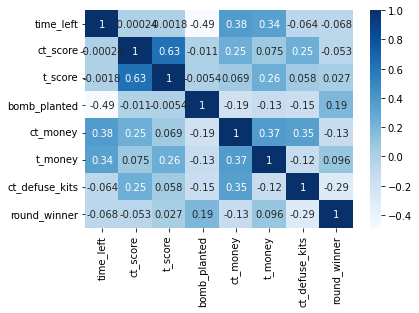

In [ ]:
sns.heatmap(train[['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_money', 't_money', 'ct_defuse_kits', 'round_winner']].corr(), cmap='Blues', annot=True)


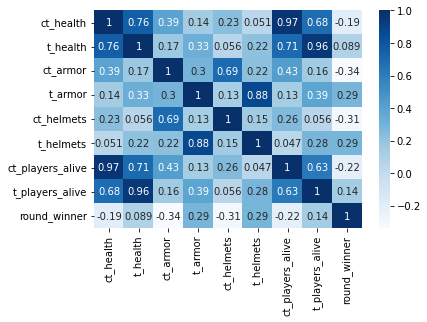

In [ ]:
sns.heatmap(train[['ct_health', 't_health', 'ct_armor', 't_armor','ct_helmets', 't_helmets','ct_players_alive', 't_players_alive', 'round_winner']].corr(), cmap='Blues', annot=True)


In [ ]:
pairplot(data=train.loc[:,['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_money', 't_money', 'ct_defuse_kits', 'round_winner']], diag_kind='kde')

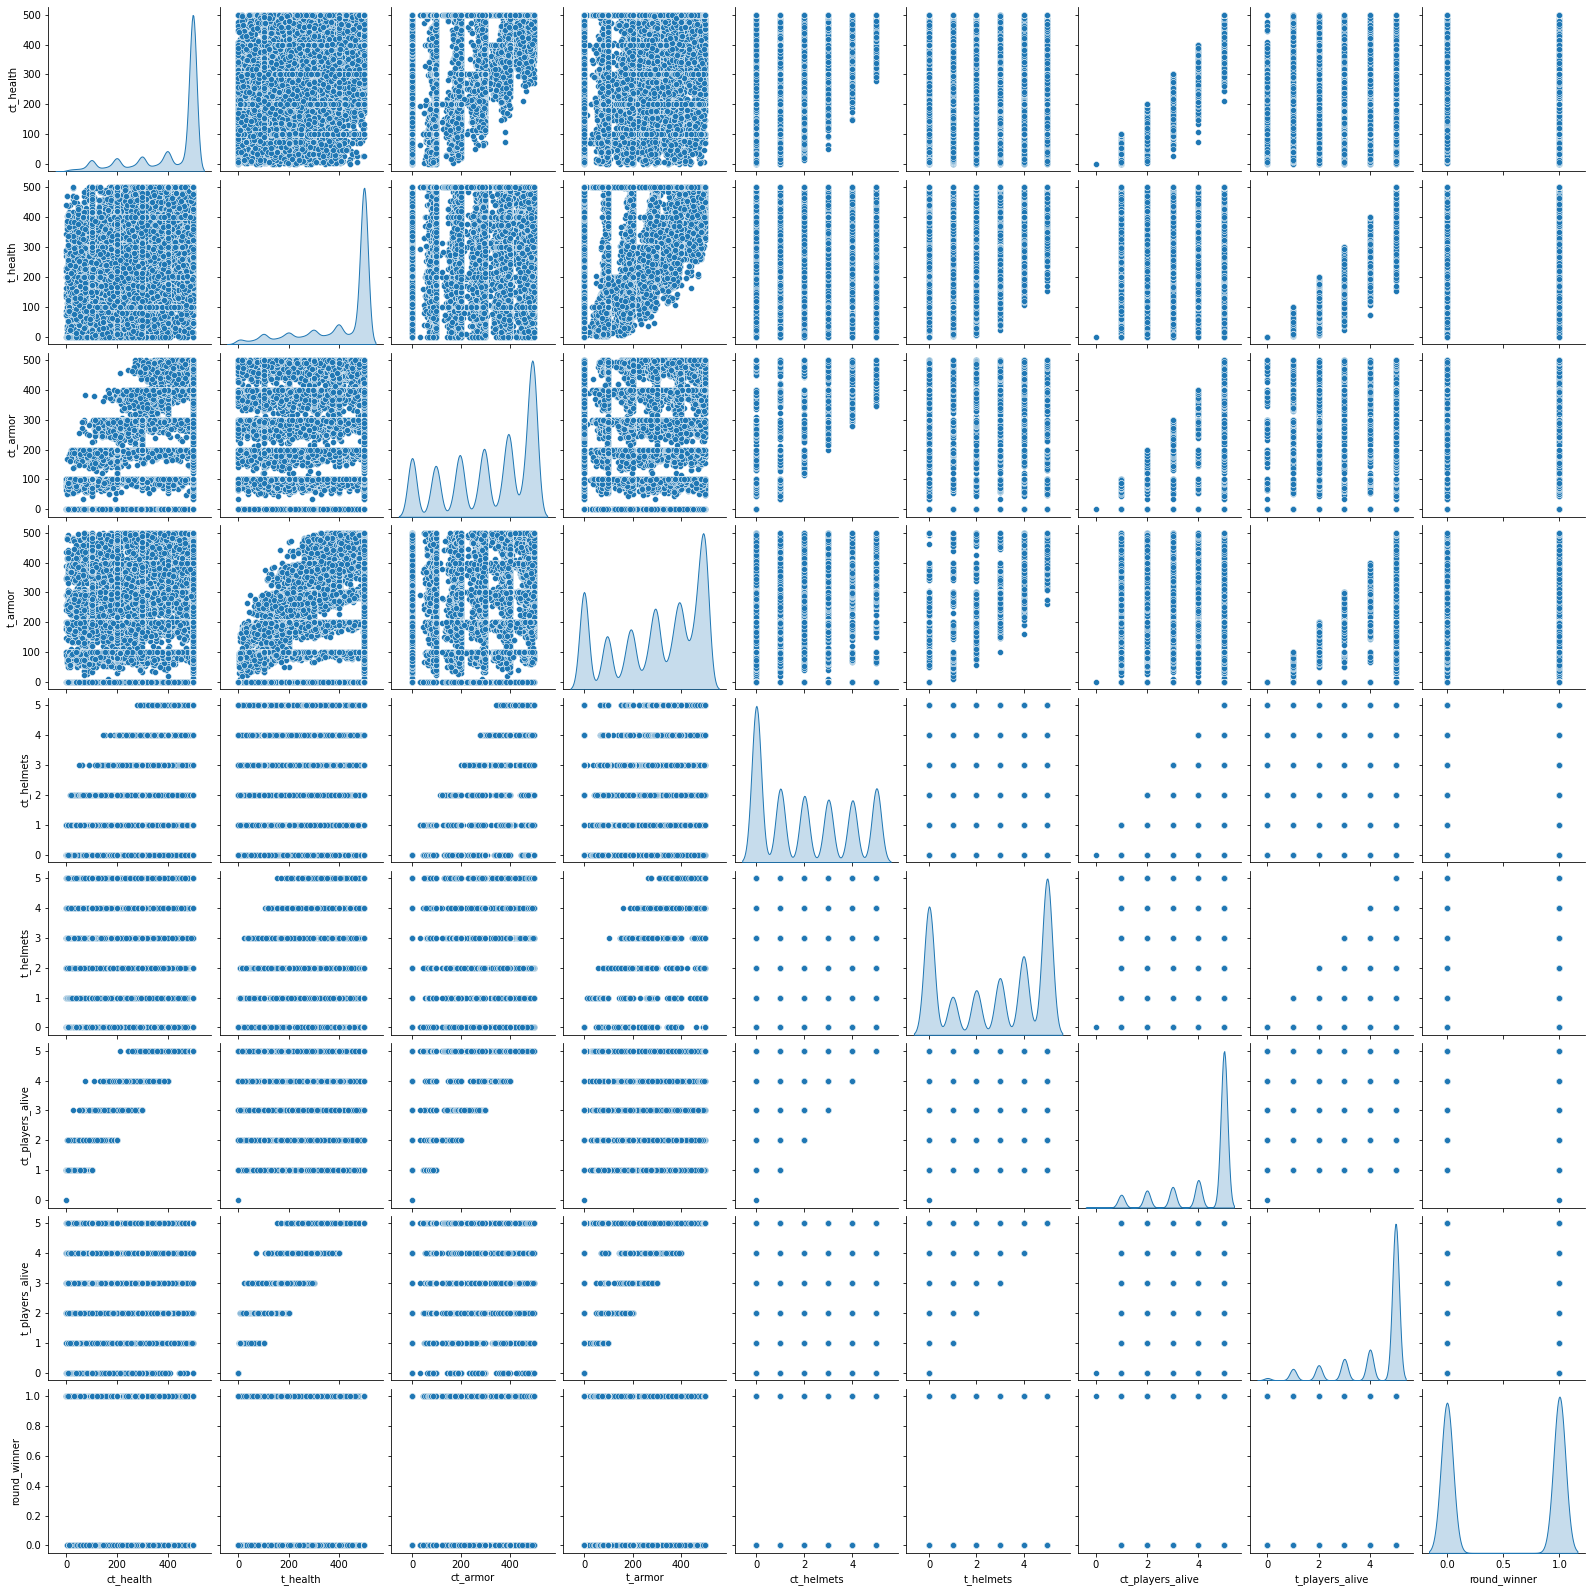

In [ ]:
pairplot(data=train.loc[:,['ct_health', 't_health', 'ct_armor', 't_armor','ct_helmets', 't_helmets','ct_players_alive', 't_players_alive', 'round_winner']], diag_kind='kde')

## Bomb_planted

In [ ]:
print(train.groupby('bomb_planted')["round_winner"].mean()*100) #shows winratio of Terro

bomb_planted
False    47.634311
True     77.459663
Name: round_winner, dtype: float64


Podemos inferir que es mas probable que T gane cuando se planta la bomba, mientras que es mas probable que gane CT cuando no se planta la bomba.

T=1
CT=0

Primeras transformaciones planteadas: bomb_planted a 1 si es True y a 0 si es False, ya que t=1 ct=0

## Map

Planteamos además aplicar un Ordinal Encoder según la media.
Además probar también con medias publicadas en la web para ver si los datos estan sesgados. 

*Finalmente, dejamos como trabajo futuro trabajar con las medias publicadas en la web.*

Planteamos eliminar las filas del mapa cache ya que existen solo 89 partidas jugadas en este mapa y el algoritmo aprendería mal para este mapa.

*Finalmente, no aplicado, pues empeoraba el modelo.*

In [ ]:
print(train.groupby('map')["round_winner"].mean()*100)# shows winratio Terrorist
print(train.groupby('map')["round_winner"].count())

map
de_cache       31.460674
de_dust2       54.343615
de_inferno     54.541629
de_mirage      50.852602
de_nuke        46.461702
de_overpass    49.343273
de_train       45.840070
de_vertigo     53.030303
Name: round_winner, dtype: float64
map
de_cache          89
de_dust2       13422
de_inferno     14257
de_mirage      11201
de_nuke        11319
de_overpass     8451
de_train        8041
de_vertigo      6666
Name: round_winner, dtype: int64


## Defuse_kits

Plantemos destacar la importancia de comprar defuse kits pero juntar [3,4 y 5] ya que su porcentaje es muy similar.

*No obstante, lo probamos y vimos que empeoraba el rendimiento.*

In [ ]:
print(train.groupby('ct_defuse_kits')["round_winner"].mean()*100)# shows winratio Terrorist

ct_defuse_kits
0.0    70.387928
1.0    51.154519
2.0    40.963042
3.0    34.286340
4.0    31.146156
5.0    31.387598
Name: round_winner, dtype: float64


## Score

Observamos que realmente que esta columna no aporta por si sola informacion demasiado relevante, por lo
que planteamos realizar una resta entre ambas T-CT en una nueva columna para q sea productiva, ya que 
lo que realmente importa es el numero de rondas que has ganado respecto al equipo contrario.

Podemos ver que a partir de la ronda 15, los datos son outliers y que realmente la probabilidad de ganar es 50-50, pero al aplicar la resta se normalizan.

In [ ]:
print(train.groupby('ct_score')["round_winner"].mean()*100)
print(train.groupby('ct_score')["round_winner"].count())

ct_score
0.0      62.420741
1.0      52.698781
2.0      52.006981
3.0      50.747384
4.0      49.102588
5.0      49.864130
6.0      49.157419
7.0      51.766139
8.0      50.777423
9.0      45.482353
10.0     51.512968
11.0     44.771151
12.0     49.743435
13.0     48.353096
14.0     50.681743
15.0     49.296283
16.0     37.473233
17.0     46.769231
18.0     48.101266
19.0     49.180328
20.0     36.144578
21.0     49.484536
22.0     15.254237
23.0     25.000000
24.0     48.275862
25.0     28.571429
26.0     38.461538
27.0     77.142857
28.0     76.470588
29.0     54.545455
30.0     61.538462
31.0     80.000000
32.0    100.000000
Name: round_winner, dtype: float64
ct_score
0.0     7097
1.0     5169
2.0     5157
3.0     5352
4.0     5293
5.0     5152
6.0     4866
7.0     4926
8.0     4695
9.0     4250
10.0    4164
11.0    3605
12.0    3313
13.0    3036
14.0    3007
15.0    2771
16.0     467
17.0     325
18.0     237
19.0     122
20.0      83
21.0      97
22.0      59
23.0      40
24.0    

## Health, Armor y Players_alive


Pensamos que con Health se podría hacer lo mismo pero habría que dividirlo entre players_alive,
pues no es lo mismo un jugador con 60 de vida que 4 jugadores con 15. Además,
pensamos que podríamos restar también la armadura o incluso añadirla a la operación anterior

En consecuencia, planteamos eliminar las columnas de player_alive ya que la información que nos proporciona ya estaría recogida en "health" y "armor".

*Finalmente aplicamos las operaciones en Health y en Armor por separado, eliminando posteriormente players_alive.*

## Helmets

Plantemos destacar la importancia de comprar  cascos pero juntar [0 y 1] y [3 ,4 y 5] ya que su porcentaje es muy similar
y separar [2] ya q es un 50%.

*En la práctica observamos que era mas eficiente restar ct_helmets y t_helmets ya que eliminamos una columna.*

In [ ]:
print(100-train.groupby('ct_helmets')["round_winner"].mean()*100)
print(train.groupby('t_helmets')["round_winner"].mean()*100)

ct_helmets
0.0    32.430918
1.0    36.901821
2.0    48.944162
3.0    60.148355
4.0    67.457295
5.0    71.330965
Name: round_winner, dtype: float64
t_helmets
0.0    29.098667
1.0    30.848006
2.0    50.337423
3.0    62.379460
4.0    64.217308
5.0    63.246890
Name: round_winner, dtype: float64


## Time_left

Hemos visto que de 115 a 155 no hay datos. Entre 155 y 175 sí que hay datos, por lo que pensamos que serían las rondas donde se han plantado las bombas, pero no logramos entenderlo.





Planteamos tratar time_left por percentiles de tal forma que los datos entre 115 y 175 sean el último, ya que entendemos que pertenecen a una categoría concreta.



bomb_planted
False    20254
Name: round_winner, dtype: int64


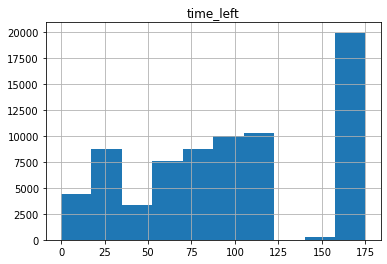

In [ ]:
train.hist("time_left")
train[train["time_left"].between(115,175.1)].hist("time_left")
print(train[train["time_left"].between(115.0,175.1)].groupby('bomb_planted')["round_winner"].count())

## Weapons


El objetivo de este for es tratar de observar la presencia de las armas con el fin de 
poder eliminar algunas de ellas. Observamos la no presencia de algunas como:


  *t_weapon_scar20*


 *ct_weapon_sawedoff*


 *t_weapon_r8revolver*


 *ct_weapon_r8revolver*


 *ct_weapon_bizon*


 *t_weapon_negev*


  *ct_weapon_g3sg1*




Así como la baja presencia de otras como:


*Hay 1 de ct_weapon_m249*


*Hay 1 de ct_weapon_negev*


*Hay 4 de t_weapon_mag7*


*Hay 9 de t_weapon_bizon*


*Hay 10 de t_weapon_sawedoff*


*Hay 10 de t_weapon_p90*


*Hay 13 de ct_weapon_p90*


*Hay 10 t_weapon_nova y 73 ct_weapon_nova*


*Hay 24 de 't_weapon_xm1014'*


*Hay 55 de ct_weapon_scar20*





Dudamos de si eliminar:


*ct_weapon_elite  297  t_weapon_elite  123 ct mp5 108 t mp5 198  mp7 t_weapon_g3sg1 = 39 y varias con 2 y 3 compras*



Existen casos especiales; hay valores de glock y usps con valor mayor que 5 que son porque se compran en la ronda 15 o 30, cuando el dinero ya no importa,planteamos el reducirlo a 5 para que no aprenda mal.


**Finalmente tras ejecutar una batería de pruebas, lo óptimo era dropear las no usadas y las muy poco usadas, además, no tratar la glock y la usps ya que bajaba el rendimiento.**


In [ ]:
weapons=['ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug','ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon','ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite', 't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas','ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar','t_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock','ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s','ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10','ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd','ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',  'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova', 'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver','t_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff', 'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553', 't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08', 'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014','t_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle', 'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps','t_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000','t_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9']

for i in weapons:
  print(train.groupby(i)["round_winner"].count())

#Observar un caso concreto:
print(train.groupby('ct_weapon_elite')["round_winner"].count())
print(train.groupby('t_weapon_elite')["round_winner"].count())

print(train.groupby('ct_weapon_elite')["round_winner"].mean()*100)
print(train.groupby('t_weapon_elite')["round_winner"].mean()*100)

ct_weapon_ak47
0.0    57823
1.0    11777
2.0     3226
3.0      578
4.0       42
Name: round_winner, dtype: int64
t_weapon_ak47
0.0    31224
1.0    15022
2.0    12417
3.0     8662
4.0     5031
5.0     1090
Name: round_winner, dtype: int64
ct_weapon_aug
0.0    66009
1.0     5735
2.0     1063
3.0      454
4.0      170
5.0       15
Name: round_winner, dtype: int64
t_weapon_aug
0.0    72916
1.0      507
2.0       20
3.0        3
Name: round_winner, dtype: int64
ct_weapon_awp
0.0    38993
1.0    27092
2.0     7259
3.0       85
4.0       16
5.0        1
Name: round_winner, dtype: int64
t_weapon_awp
0.0    50206
1.0    22900
2.0      338
3.0        2
Name: round_winner, dtype: int64
ct_weapon_bizon
0.0    73446
Name: round_winner, dtype: int64
t_weapon_bizon
0.0    73437
1.0        9
Name: round_winner, dtype: int64
ct_weapon_cz75auto
0.0    64451
1.0     7306
2.0     1361
3.0      273
4.0       52
5.0        3
Name: round_winner, dtype: int64
t_weapon_cz75auto
0.0    67114
1.0     5131
2.0   


A partir de los datos extraidos decidimos agrupar las repeticiones de armas en función de su winratio.
El caso especial es las usps que decidimos ponerle que si hay mas de 0 en terrorist, asignarle un 3 ya que sube mucho su winratio

*Finalmente, no lo aplicamos ya que empeoraba el rendimiento.*

In [ ]:
toparmas=["ct_weapon_ak47","t_weapon_ak47", "ct_weapon_awp", "t_weapon_awp","ct_weapon_m4a4","t_weapon_m4a4","ct_weapon_sg553", "t_weapon_sg553", "t_weapon_usps"]
for i in toparmas:
  print(train.groupby(i)["round_winner"].mean()*100)
  print(train.groupby(i)["round_winner"].count())


ct_weapon_ak47
0.0    55.194300
1.0    37.760041
2.0    28.487291
3.0    26.816609
4.0    19.047619
Name: round_winner, dtype: float64
ct_weapon_ak47
0.0    57823
1.0    11777
2.0     3226
3.0      578
4.0       42
Name: round_winner, dtype: int64
t_weapon_ak47
0.0    37.631309
1.0    57.422447
2.0    63.445277
3.0    63.345648
4.0    60.763268
5.0    59.266055
Name: round_winner, dtype: float64
t_weapon_ak47
0.0    31224
1.0    15022
2.0    12417
3.0     8662
4.0     5031
5.0     1090
Name: round_winner, dtype: int64
ct_weapon_awp
0.0    60.446747
1.0    42.019784
2.0    33.888965
3.0    32.941176
4.0    12.500000
5.0     0.000000
Name: round_winner, dtype: float64
ct_weapon_awp
0.0    38993
1.0    27092
2.0     7259
3.0       85
4.0       16
5.0        1
Name: round_winner, dtype: int64
t_weapon_awp
0.0     45.902880
1.0     61.912664
2.0     64.497041
3.0    100.000000
Name: round_winner, dtype: float64
t_weapon_awp
0.0    50206
1.0    22900
2.0      338
3.0        2
Name: round_win

'\nA partir de los datos extraidos decidimos agrupar las repeticiones de armas en función de su winratio.\nEl caso especial es las usps que decidimos ponerle que si hay mas de 0 en terro, asignarle un 3 ya que sube mucho su winratio\n'

## Granadas

Por otra parte, respecto de las granadas, consultamos decoy ya que sabemos
que dentro del juego no tienen demasiado impacto. Efectivamente vemos que con suficientes datos (para 2 y 3 compras existen pocos valores) el winrate es 50% por lo que no afectan y se podrian dropear.

In [ ]:
print(train.groupby('t_grenade_decoygrenade')["round_winner"].count())
print(train.groupby('ct_grenade_decoygrenade')["round_winner"].count())

print(train.groupby('t_grenade_decoygrenade')["round_winner"].mean()*100)
print(train.groupby('ct_grenade_decoygrenade')["round_winner"].mean()*100)

t_grenade_decoygrenade
0.0    71658
1.0     1721
2.0       67
Name: round_winner, dtype: int64
ct_grenade_decoygrenade
0.0    71460
1.0     1920
2.0       64
3.0        2
Name: round_winner, dtype: int64
t_grenade_decoygrenade
0.0    50.774512
1.0    58.919233
2.0    68.656716
Name: round_winner, dtype: float64
ct_grenade_decoygrenade
0.0    51.179681
1.0    43.802083
2.0    46.875000
3.0     0.000000
Name: round_winner, dtype: float64


># **Preprocesamiento**


In [2]:
if train["round_winner.1"].equals(train["round_winner"]):
  print("Son iguales")
#Al ver que ambas son iguales, decidimos eliminar round_winner.1
train=train.drop(["round_winner.1"], axis=1)

Son iguales


In [3]:
X= train.iloc[:, :-1]
y=train["round_winner"]
xTest=test.iloc[:,1:]

## Time_left

In [4]:
prueba=train
prueba = prueba.drop(prueba[prueba["time_left"].between(115.1,175.1)].index)
'''
El primer percentil coincide aproximadamente con el tiempo que tarda la bomba en explotar (35s)
'''
def percentilesTimeLeft(columna):
  x=prueba[columna].quantile([0,0.2,0.4,0.6,0.8,1])
  qs=[]
  for i in range(len(x)):
    qs=qs+[x.iloc[i]]
  j=1
  med=[]

  return qs
Perc=percentilesTimeLeft("time_left")
print(Perc)

[0.01, 34.91, 54.96, 85.48, 100.34, 115.0]


In [5]:
'''
Cuanto mas tiempo haya pasado mas probable es que gane CT a no ser q haya plantado la bomba
'''
for i in X.index:
  if X.at[i,"time_left"]<34.91:
    X.at[i,"time_left"]=0
  elif X.at[i,"time_left"]>=34.91  and X.at[i,"time_left"]<54.96:
    X.at[i,"time_left"]=1
  elif X.at[i,"time_left"]>=54.96 and X.at[i,"time_left"]<85.48:
    X.at[i,"time_left"]=2
  elif X.at[i,"time_left"]>=85.48 and X.at[i,"time_left"]<100.34:
    X.at[i,"time_left"]=3
  elif X.at[i,"time_left"]>=100.34 and X.at[i,"time_left"]<115.01:
    X.at[i,"time_left"]=4
  else:
    X.at[i,"time_left"]=5


for i in xTest.index:
  if xTest.at[i,"time_left"]<34.91:
    xTest.at[i,"time_left"]=0
  elif xTest.at[i,"time_left"]>=34.91  and xTest.at[i,"time_left"]<54.96:
    xTest.at[i,"time_left"]=1
  elif xTest.at[i,"time_left"]>=54.96 and xTest.at[i,"time_left"]<85.48:
    xTest.at[i,"time_left"]=2
  elif xTest.at[i,"time_left"]>=85.48 and xTest.at[i,"time_left"]<100.34:
    xTest.at[i,"time_left"]=3
  elif xTest.at[i,"time_left"]>=100.34 and xTest.at[i,"time_left"]<115.01:
    xTest.at[i,"time_left"]=4
  else:
    xTest.at[i,"time_left"]=5


## Score

In [6]:
X["ct_score"]=X.apply( lambda row: row['t_score']- row['ct_score'],axis=1)
xTest["ct_score"]=xTest.apply( lambda row: row['t_score']- row['ct_score'],axis=1)

## Health

In [7]:
def zeroDivision(n, d):
    return n / d if d else 0

X["ct_health"]=X.apply( lambda row: zeroDivision(row['t_health'],row["t_players_alive"])- zeroDivision(row['ct_health'],row["ct_players_alive"]),axis=1)
xTest["ct_health"]=xTest.apply( lambda row: zeroDivision(row['t_health'],row["t_players_alive"])- zeroDivision(row['ct_health'],row["ct_players_alive"]),axis=1)

## Armor

In [8]:
X["ct_armor"]=X.apply( lambda row: zeroDivision(row['t_armor'],row["t_players_alive"])- zeroDivision(row['ct_armor'],row["ct_players_alive"]),axis=1)
xTest["ct_armor"]=xTest.apply( lambda row: zeroDivision(row['t_armor'],row["t_players_alive"])- zeroDivision(row['ct_armor'],row["ct_players_alive"]),axis=1)

## Money

In [9]:
X["ct_money"]=X.apply( lambda row: row['t_money']- row['ct_money'],axis=1)
xTest["ct_money"]=xTest.apply( lambda row: row['t_money']- row['ct_money'],axis=1)

## Helmets

In [10]:
X["ct_helmets"]=X.apply( lambda row: row['t_helmets']- row['ct_helmets'],axis=1)
xTest["ct_helmets"]=xTest.apply( lambda row: row['t_helmets']- row['ct_helmets'],axis=1)

## Transformer

In [11]:
column_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("time_left", sklearn.preprocessing.StandardScaler(), [0]),
    ("ct_score", "passthrough", [1]),                                                       
    ("t_score", "drop", [2]),
    ("map",sklearn.preprocessing.OrdinalEncoder(categories=[["de_cache","de_train","de_nuke","de_overpass","de_mirage", "de_vertigo", "de_dust2","de_inferno"]]),[3]),
    ("bomb_planted", sklearn.preprocessing.OneHotEncoder(drop="first"), [4]),
    ("ct_health", sklearn.preprocessing.StandardScaler(), [5]),
    ("t_health","drop", [6]),
    ("ct_armor",sklearn.preprocessing.StandardScaler(), [7]),
    ("t_armor","drop", [8]),
    ("ct_money",sklearn.preprocessing.StandardScaler(), [9]),
    ("t_money","drop", [10]),
    ("ct_helmets","passthrough", [11]),
    ("t_helmets","drop", [12]),
    ("ct_defuse_kits","passthrough", [13]),
    ("ct_players_alive","drop", [14]),
    ("t_players_alive","drop", [15]),
    ("ct_weapon_bizon","drop", [22]), 
    ("t_weapon_bizon", "drop",[23]),
    ("ct_weapon_elite","drop",[26]),
    ("t_weapon_elite", "drop",[27]),
    ("ct_weapon_g3sg1","drop",[30]), 
    ("t_weapon_g3sg1", "drop",[31]),
    ("ct_weapon_m249","drop",[36]), 
    ("t_weapon_m249", "drop",[37]),
    ("t_weapon_mag7", "drop",[45]),
    ("ct_weapon_negev", "drop",[52]),
    ("t_weapon_negev", "drop",[53]),
    ("ct_weapon_nova", "drop",[54]),
    ("t_weapon_nova", "drop",[55]),
    ("ct_weapon_p90","drop",[56]), 
    ("t_weapon_p90", "drop",[57]),
    ("ct_weapon_r8revolver", "drop",[58]),
    ("t_weapon_r8revolver", "drop",[59]),
    ("ct_weapon_sawedoff", "drop",[60]),
    ("t_weapon_sawedoff","drop",[61]),
    ("ct_weapon_scar20", "drop",[62]),
    ("t_weapon_scar20", "drop", [63]),
    ("t_weapon_xm1014", "drop",[71]),
    ("ct_grenade_hegrenade","drop",[84]),
    ("t_grenade_hegrenade", "drop",[85]),
    ("ct_grenade_flashbang","drop",[86]),
    ("t_grenade_flashbang", "drop",[87]),
    ("ct_grenade_smokegrenade","drop",[88]),
    ("t_grenade_smokegrenade", "drop",[89]),
    ("ct_grenade_incendiarygrenade","drop",[90]),
    ("t_grenade_incendiarygrenade", "drop",[91]),
    ("ct_grenade_molotovgrenade","drop",[92]),
    ("t_grenade_molotovgrenade", "drop",[93]),
    ("ct_grenade_decoygrenade","drop",[94]),
    ("t_grenade_decoygrenade", "drop",[95])

], remainder="passthrough")

XTransformed = column_transformer.fit_transform(X)
XTransformed= pd.DataFrame(XTransformed, columns=["time_left", "score", "map", "bomb_planted", "health","armor", "money", "helmets", "ct_defuse_kits",
                                                  "ct_weapon_ak47", "t_weapon_ak47", "ct_weapon_aug", "t_weapon_aug","ct_weapon_awp", "t_weapon_awp","ct_weapon_cz75auto", 
                                                  "t_weapon_cz75auto", "ct_weapon_famas", "t_weapon_famas","ct_weapon_galilar", "t_weapon_galilar", "ct_weapon_glock", "t_weapon_glock",
                                                  "ct_weapon_m4a1s", "t_weapon_m4a1s","ct_weapon_m4a4", "t_weapon_m4a4", "ct_weapon_mac10", "t_weapon_mac10","ct_weapon_mag7", "ct_weapon_mp5sd",
                                                  "t_weapon_mp5sd","ct_weapon_mp7", "t_weapon_mp7", "ct_weapon_mp9", "t_weapon_mp9","ct_weapon_sg553","t_weapon_sg553", "ct_weapon_ssg08", "t_weapon_ssg08",
                                                  "ct_weapon_ump45", "t_weapon_ump45", "ct_weapon_xm1014","ct_weapon_deagle", "t_weapon_deagle","ct_weapon_fiveseven", "t_weapon_fiveseven", "ct_weapon_usps",
                                                  "t_weapon_usps", "ct_weapon_p250", "t_weapon_p250", "ct_weapon_p2000","t_weapon_p2000", "ct_weapon_tec9", "t_weapon_tec9" ])
XTransformed


time_left  score  map  bomb_planted    health     armor     money  \
0       1.206549    2.0  5.0           0.0  0.206092 -1.962731  0.676716   
1       0.649869    1.0  1.0           0.0  0.206092  0.098080 -0.098012   
2      -1.576850    1.0  1.0           1.0  1.563765  0.255331  0.036223   
3       1.206549  -12.0  2.0           0.0  0.206092 -0.845424 -0.489212   
4       1.206549    4.0  4.0           0.0  0.206092  2.496567  0.078411   
...          ...    ...  ...           ...       ...       ...       ...   
73441   0.649869    7.0  7.0           0.0  0.206092  0.857849 -0.216906   
73442   1.206549   -1.0  1.0           0.0  0.206092  1.195524 -0.473870   
73443   0.649869   -5.0  2.0           0.0  0.206092  0.485414 -1.294622   
73444   0.649869    2.0  4.0           0.0  0.206092  0.098080 -1.145046   
73445   0.093189   -1.0  1.0           0.0  0.939235  0.081941 -0.588929   

       helmets  ct_defuse_kits  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  \
0         -4.0             3.0             1.0            0.0            0.0   
1          0.0             0.0             0.0            0.0            0.0   
2          3.0             0.0             0.0            1.0            0.0   
3          0.0             1.0             0.0            0.0            0.0   
4          5.0             0.0             0.0            1.0            0.0   
...        ...             ...             ...            ...            ...   
73441      3.0             1.0             0.0            1.0            0.0   
73442      2.0             2.0             0.0            2.0            0.0   
73443      0.0             5.0             1.0            1.0            0.0   
73444     -4.0             5.0             0.0            0.0            0.0   
73445      0.0             4.0             0.0            2.0            0.0   

       t_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_cz75auto  \
0               0.0            0.0           0.0                 0.0   
1               0.0            0.0           0.0                 0.0   
2               0.0            0.0           0.0                 0.0   
3               0.0            0.0           0.0                 0.0   
4               0.0            0.0           0.0                 0.0   
...             ...            ...           ...                 ...   
73441           0.0            0.0           0.0                 0.0   
73442           0.0            1.0           1.0                 0.0   
73443           0.0            1.0           0.0                 0.0   
73444           0.0            4.0           0.0                 0.0   
73445           0.0            2.0           1.0                 0.0   

       t_weapon_cz75auto  ct_weapon_famas  t_weapon_famas  ct_weapon_galilar  \
0                    0.0              0.0             0.0                0.0   
1                    0.0              0.0             0.0                0.0   
2                    0.0              0.0             0.0                1.0   
3                    0.0              0.0             0.0                0.0   
4                    0.0              0.0             0.0                0.0   
...                  ...              ...             ...                ...   
73441                0.0              0.0             0.0                0.0   
73442                0.0              0.0             0.0                0.0   
73443                0.0              0.0             0.0                0.0   
73444                1.0              0.0             0.0                0.0   
73445                0.0              0.0             0.0                0.0   

       t_weapon_galilar  ct_weapon_glock  t_weapon_glock  ct_weapon_m4a1s  \
0                   0.0              0.0             5.0              0.0   
1                   0.0              0.0             5.0              0.0   
2                   1.0              0.0             3.0              0.0   

># **Entrenamiento**


Para probar los distintos clasificadores utilizamos el split al 25% de los datos. No obstante, a la hora de subir los modelos observamos que al entrenar el clasificador con el 100% de los datos, el modelo se optimizaba, por lo que el entrenamiento final se realizó con el 100% de estos.



In [12]:
clf = xgb.XGBClassifier(n_estimators=5,max_depth=5).fit(XTransformed, y)

## Ajuste de hiperparámetros para nuestro modelo, xgboost




In [14]:
X_train, X_test, y_train, y_test = train_test_split(XTransformed, y, test_size=0.25, random_state=42)

In [ ]:
maxi=0
maxj=0
min=1000000
for i in [600,650,700,750]:
  for j in [14,16,18]:
    clf = xgb.XGBClassifier(n_estimators=i,max_depth=j).fit(X_train, y_train)
    y_pred = clf.predict(X_test)   
    cm=confusion_matrix(y_test, y_pred)
    errores=cm[0][1]+cm[1][0]
    if errores<min:
      min=errores
      maxi=i
      maxj=j
      errorCT=cm[0][1]
      errorT=cm[1][0]
    elif errores==min:
      maxi=[maxi]+[i]
      maxj=[maxj]+[j]
      errorCT=[errorCT]+[cm[0][1]]
      errorT=[errorT]+[cm[1][0]]
print("Estimadores: ", maxi, " Profundidad: ", maxj, " Error CT: ", errorCT, " Error T: ", errorT)

Estimadores:  [650, 700]  Profundidad:  [16, 16]  Error CT:  [1161, 1164]  Error T:  [1244, 1241]


## Otros modelos y sus ajustes de hiperparámetros.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XTransformed, y, test_size=0.25, random_state=42)

### LogisticRegression

In [ ]:
    clf = LogisticRegression(random_state=0,solver='lbfgs',max_iter=100000).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(0,100000,classification_report(y_test, y_pred, target_names=["CT","T"]))
    plot_confusion_matrix(clf, X_test, y_test, display_labels=[0,1], cmap=plt.cm.Blues)
    plt.show() 

0 100000               precision    recall  f1-score   support

           T       0.74      0.76      0.75      9003
          CT       0.76      0.74      0.75      9359

    accuracy                           0.75     18362
   macro avg       0.75      0.75      0.75     18362
weighted avg       0.75      0.75      0.75     18362



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


### LinearSVC

In [ ]:
clf = LinearSVC(max_iter=100000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(100000,classification_report(y_test, y_pred, target_names=["CT","T"]))
plot_confusion_matrix(clf, X_test, y_test, display_labels=[0,1], cmap=plt.cm.Blues)
plt.show() 

100000               precision    recall  f1-score   support

           T       0.74      0.76      0.75      9003
          CT       0.76      0.74      0.75      9359

    accuracy                           0.75     18362
   macro avg       0.75      0.75      0.75     18362
weighted avg       0.75      0.75      0.75     18362



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


### NoLinearSVC

Esta parte del código tardaba demasiado en ejecutarse (hasta el punto que no pudimos llegar a ejecutarlo), por lo que en realidad no ha sido probado


In [ ]:

clf = svm.SVC(kernel='rbf', gamma=2, C=0.08, probability=True)
clf.fit(X_train, y_train)
print(i,j,classification_report(y_test, y_pred, target_names=["CT","T"]))
plot_confusion_matrix(clf, X_test, y_test, display_labels=[0,1], cmap=plt.cm.Blues)
plt.show()
y_pred = clf.predict(X_test)


### RandomForest

In [ ]:
maxi=0
maxj=0
min=1000000
for i in [200, 250, 300, 350, 400]:
  for j in [20, 30, 40, 50, 60, 70]:
    clf=RandomForestClassifier(n_estimators= i, criterion='entropy', max_depth=j,random_state=42).fit(X_train,y_train)
    y_pred = clf.predict(X_test)   
    cm=confusion_matrix(y_test, y_pred)
    errores=cm[0][1]+cm[1][0]
    if errores<min:
      min=errores
      maxi=i
      maxj=j
      errorCT=cm[0][1]
      errorT=cm[1][0]
    elif errores==min:
      maxi=[maxi]+[i]
      maxj=[maxj]+[j]
      errorCT=[errorCT]+[cm[0][1]]
      errorT=[errorT]+[cm[1][0]]
print("Estimadores: ", maxi, " Profundidad: ", maxj, " Error CT: ", errorCT, " Error T: ", errorT)

Estimadores:  [[350, 400], 400]  Profundidad:  [[50, 30], 50]  Error CT:  [[1144, 1143], 1148]  Error T:  [[1322, 1323], 1318]


### AdaBoost

In [ ]:
maxi=0
maxj=0
min=1000000
for i in [100, 200, 300, 400, 500, 700, 900, 1000]:
  clf=AdaBoostClassifier(n_estimators=i).fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  cm=confusion_matrix(y_test, y_pred)
  errores=cm[0][1]+cm[1][0]
  if errores<min:
    min=errores
    maxi=i
    maxj=j
    errorCT=cm[0][1]
    errorT=cm[1][0]
  elif errores==min:
    maxi=[maxi]+[i]
    maxj=[maxj]+[j]
    errorCT=[errorCT]+[cm[0][1]]
    errorT=[errorT]+[cm[1][0]]
print("Estimadores: ", maxi, " Profundidad: ", maxj, " Error CT: ", errorCT, " Error T: ", errorT)

Estimadores:  900  Profundidad:  70  Error CT:  2114  Error T:  2481


### GradientBoost

In [ ]:
maxi=0
maxj=0
maxk=""
min=1000000
for i in [300, 350, 400, 450, 500]:
  for j in [40, 50, 60, 70]:
    for k in ("friedman_mse", "squared_error"):
      clf = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0, criterion=k, max_depth=j, random_state=42).fit(X_train, y_train)
      y_pred = clf.predict(X_test)   
      cm=confusion_matrix(y_test, y_pred)
      errores=cm[0][1]+cm[1][0]
      if errores<min:
        min=errores
        maxi=i
        maxj=j
        maxk=k
        errorCT=cm[0][1]
        errorT=cm[1][0]
      elif errores==min:
        maxi=[maxi]+[i]
        maxj=[maxj]+[j]
        maxj=[maxk]+[k]
        errorCT=[errorCT]+[cm[0][1]]
        errorT=[errorT]+[cm[1][0]]
print("Estimadores: ", maxi, " Profundidad: ", maxj, "Criterion: ",maxk," Error CT: ", errorCT, " Error T: ", errorT)

Estimadores:  500  Profundidad:  40 Criterion:  squared_error  Error CT:  1605  Error T:  1473


### DecisionTree

In [ ]:
maxi=0
maxj=""
min=1000000

for i in [37, 38, 39, 40, 41, 42]:
  for j in ("gini", "entropy"):
    clf = DecisionTreeClassifier(criterion=j, splitter='random', max_depth=i, random_state=43).fit(X_train,y_train)
    y_pred = clf.predict(X_test)   
    cm=confusion_matrix(y_test, y_pred)
    errores=cm[0][1]+cm[1][0]
    if errores<min:
      bestclf=clf
      min=errores
      maxi=i
      maxj=j
      errorCT=cm[0][1]
      errorT=cm[1][0]
    elif errores==min:
      maxi=[maxi]+[i]
      maxj=[maxj]+[j]
      errorCT=[errorCT]+[cm[0][1]]
      errorT=[errorT]+[cm[1][0]]
print("Estimadores: ", maxi, " Criterion: ", maxj, " Error CT: ", errorCT, " Error T: ", errorT)


dot_data = StringIO()
export_graphviz(bestclf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names=XTransformed.columns, class_names=["CT", "T"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


Estimadores:  41  Criterion:  gini  Error CT:  1892  Error T:  1868
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0760008 to fit



### Ensembles

In [ ]:
clf1 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=41, random_state=42)
clf2 = RandomForestClassifier(n_estimators= 400, criterion='entropy', max_depth=50,random_state=42)
clf3 = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, criterion='squared_error', max_depth=40, random_state=42)
estimators = [('dt', clf1), ('RF', clf2), ('GB', clf3)]
clf= xgb.XGBClassifier(n_estimators=700,max_depth=16)
sclf_pass_true = StackingClassifier(estimators=estimators,final_estimator=clf, passthrough=True).fit(X_train, y_train)


NameError: ignored

In [ ]:
y_pred = sclf_pass_true.predict(X_test)   
cm=confusion_matrix(y_test, y_pred)
print(cm[0][1], cm[1][0])

1146 1237


> # **Validación del modelo**

In [15]:
print("-------------------------------CONFUSION MATRIX----------------------------------")

plot_confusion_matrix(clf, X_test, y_test, display_labels=[0,1], cmap=plt.cm.Blues)
plt.show()

print("\n\n------------------------------- SCORES----------------------------------")
#El classification_report no es preciso a nivel de decimales, por lo que usamos:

a=accuracy_score(y_test, y_pred)
f=f1_score(y_test, y_pred, average='weighted')
p=precision_score(y_test,y_pred)
print("Accuracy: ",a,"F1 score: ",f,"Precision: ",p)

print("\n\n------------------------------- ROC CURVE----------------------------------")

plot_roc_curve(clf, X_test, y_test)



-------------------------------CONFUSION MATRIX----------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)




------------------------------- SCORES----------------------------------


NameError: ignored

> # **Subida del modelo**

In [ ]:
!pip install PyALE
from PyALE import ale
ale_eff = ale(
    X=XTransformed, model=clf, feature=["health", "armor"], grid_size=100000, include_CI=False
)

In [19]:
XTransformed.columns

Index(['time_left', 'score', 'map', 'bomb_planted', 'health', 'armor', 'money',
       'helmets', 'ct_defuse_kits', 'ct_weapon_ak47', 't_weapon_ak47',
       'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp', 't_weapon_awp',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_famas',
       't_weapon_famas', 'ct_weapon_galilar', 't_weapon_galilar',
       'ct_weapon_glock', 't_weapon_glock', 'ct_weapon_m4a1s',
       't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10',
       't_weapon_mac10', 'ct_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_sg553', 't_weapon_sg553', 'ct_weapon_ssg08',
       't_weapon_ssg08', 'ct_weapon_ump45', 't_weapon_ump45',
       'ct_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
       'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps',
       't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000',
       

/usr/local/lib/python3.7/dist-packages/PyALE/_src/ALE_2D.py:153: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  .sum(level=0)
/usr/local/lib/python3.7/dist-packages/PyALE/_src/ALE_2D.py:166: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  .sum(level=1)


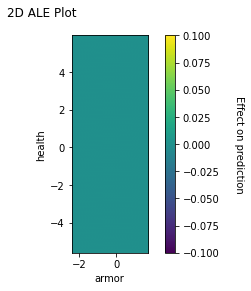

In [16]:
xTestTransformed = column_transformer.transform(xTest)
#Sin transformarlo a dataFrame cuando usamos xgboost nos daba error por lo que lo transformamos.

xTestTransformed= pd.DataFrame(xTestTransformed, columns=["time_left", "score", "map", "bomb_planted", "health","armor", "money", "helmets", "ct_defuse_kits",
                                                  "ct_weapon_ak47", "t_weapon_ak47", "ct_weapon_aug", "t_weapon_aug","ct_weapon_awp", "t_weapon_awp","ct_weapon_cz75auto", 
                                                  "t_weapon_cz75auto", "ct_weapon_famas", "t_weapon_famas","ct_weapon_galilar", "t_weapon_galilar", "ct_weapon_glock", "t_weapon_glock",
                                                  "ct_weapon_m4a1s", "t_weapon_m4a1s","ct_weapon_m4a4", "t_weapon_m4a4", "ct_weapon_mac10", "t_weapon_mac10","ct_weapon_mag7", "ct_weapon_mp5sd",
                                                  "t_weapon_mp5sd","ct_weapon_mp7", "t_weapon_mp7", "ct_weapon_mp9", "t_weapon_mp9","ct_weapon_sg553","t_weapon_sg553", "ct_weapon_ssg08", "t_weapon_ssg08",
                                                  "ct_weapon_ump45", "t_weapon_ump45", "ct_weapon_xm1014","ct_weapon_deagle", "t_weapon_deagle","ct_weapon_fiveseven", "t_weapon_fiveseven", "ct_weapon_usps",
                                                  "t_weapon_usps", "ct_weapon_p250", "t_weapon_p250", "ct_weapon_p2000","t_weapon_p2000", "ct_weapon_tec9", "t_weapon_tec9" ])

ykaggle = clf.predict(xTestTransformed)
ykaggle=pd.Series(ykaggle)

idTest=pd.Series(test["id"])
soluc=pd.concat([idTest,ykaggle], axis=1, keys=["id","round_winner"])
soluc["round_winner"]=soluc["round_winner"].apply(lambda x: 'T' if x ==1 else 'CT')


soluc.to_csv("soluc.csv", index=False)

from google.colab import drive
drive.mount('drive')
soluc.to_csv("soluc.csv", index=False)
!cp soluc.csv "drive/My Drive/Colab Notebooks"
drive.flush_and_unmount()
soluc

MessageError: ignored

> # **Transformaciones descartadas**

En primer lugar, para realizar el ajuste de hiperparametros, probamos a utilizar el accuracy, el f1 y la precision. No obstante vimos que existían modelos con el mismo numero de fallos que no se tenian en cuenta, por lo que rechazamos este ajuste.

In [ ]:
import statistics

max=0
for i in [650, 700]:
  for j in [16]:
    clf = xgb.XGBClassifier(n_estimators=i,max_depth=j).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    a=accuracy_score(y_test, y_pred)
    f=f1_score(y_test, y_pred, average='weighted')
    p=precision_score(y_test,y_pred)
    
    plot_confusion_matrix(clf, X_test, y_test, display_labels=[0,1], cmap=plt.cm.Blues)
    plt.show() 
    if statistics.mean([a,f,p])>max:
      max=statistics.mean([a,f,p])
      maxi=i
      maxj=j
      maxa=a
      maxp=p
      maxf=f
print(maxi, maxj, max, maxa, maxp, maxf)

Probamos a dropear las filas de caché, posicionandolo tanto  al principio del encoder como al final, ninguna de las dos mejoraba el rendimiento.

In [ ]:
iCache=XTransformed.loc[XTransformed['map']==0].index
iCache=XTransformed.loc[XTransformed['map']==7].index
XTransformed.drop(iCache, inplace=True)
y.drop(iCache, inplace=True)

Planteamos dividir money en percentiles, lo cual descartamos debido a lo inutil que era.

In [ ]:
#El segundo parametro es para formatear el % de CT
def calcMediaMoney(columna,esCT):
  x=train[columna].quantile([0,0.2,0.4,0.6,0.8,1])
  qs=[]
  for i in range(len(x)):
    qs=qs+[x.iloc[i]]
  j=1
  med=[]
  for i in range(0,len(qs)-1):
    med=med+[abs(esCT-train[train[columna].between(qs[i],qs[j], inclusive="left")]["round_winner"].mean()*100)]
    j+=1
  return dict(zip(qs[1:len(qs)],med))
terrMoneyMedia=calcMediaMoney("t_money",0)
counterMoneyMedia=calcMediaMoney("ct_money",100)
print(terrMoneyMedia)
print(counterMoneyMedia)

{1150.0: 41.07405919378599, 4000.0: 52.899202879917716, 10450.0: 49.877529972927675, 20200.0: 52.46519136342235, 80000.0: 58.34581347855684}
{900.0: 39.44492283235079, 3250.0: 50.62390983496579, 9050.0: 50.40633888663145, 17950.0: 40.79675894665766, 80000.0: 64.20021762785638}


Tras tratar el numero de armas agrupandolas por winratio en el mejor modelo que teníamos, vimos que no mejoraba, por lo que lo descartamos


In [ ]:

X["ct_weapon_ak47"]=X["ct_weapon_ak47"].apply(lambda x: 2.0 if x >2.0 else x)
X["t_weapon_ak47"]=X["t_weapon_ak47"].apply(lambda x: 3.0 if x >3 else (2.0 if x>1 else x))

X["ct_weapon_awp"]=X["ct_weapon_awp"].apply(lambda x: 2.0 if x >2 else x)
X["t_weapon_awp"]=X["t_weapon_awp"].apply(lambda x: 1.0 if x >1 else x)

X["ct_weapon_m4a4"]=X["ct_weapon_m4a4"].apply(lambda x: 2.0 if x >2 else x)
X["t_weapon_m4a4"]=X["t_weapon_m4a4"].apply(lambda x: 1.0 if x >1 else x)

X["ct_weapon_sg553"]=X["ct_weapon_sg553"].apply(lambda x: 2.0 if x >2 else x)
X["t_weapon_sg553"]=X["t_weapon_sg553"].apply(lambda x: 2.0 if x >2 else x)

X["t_weapon_usps"]=X["t_weapon_usps"].apply(lambda x: 3.0 if x >0 else x)



Planteamos calcular el coste de las granadas en vez de tener las granadas, incluyendo el importe dentro de money.

In [ ]:
ctgranadas=["ct_grenade_hegrenade", "ct_grenade_flashbang", "ct_grenade_smokegrenade","ct_grenade_incendiarygrenade", "ct_grenade_molotovgrenade"]
coste=[300,200,300,600,400]
tgranadas=["t_grenade_hegrenade", "t_grenade_flashbang","t_grenade_smokegrenade", "t_grenade_incendiarygrenade", "t_grenade_molotovgrenade" ]

granadas=[ctgranadas,tgranadas]
for z in range(2):
  for i, j in zip(granadas[z],coste):
    if z==0:
      X["ct_money"]=X.apply( lambda row: row["ct_money"]+row[i]*j,axis=1)
    else:
      X["t_money"]=X.apply( lambda row: row["t_money"]+row[i]*j,axis=1)

for z in range(2):
  for i, j in zip(granadas[z],coste):
    if z==0:
      xTest["ct_money"]=xTest.apply( lambda row: row["ct_money"]+row[i]*j,axis=1)
    else:
      xTest["t_money"]=xTest.apply( lambda row: row["t_money"]+row[i]*j,axis=1)

Planteamos tener una columna con el coste de grenades y weapons (restando t-ct) para reducir el numero de columnas. También probamos a dejar las armas con mas winratio. Ninguna mejoró el rendimiento.

In [ ]:
##########################  GRANADAS   #############################

ctgranadas=["ct_grenade_hegrenade", "ct_grenade_flashbang", "ct_grenade_smokegrenade","ct_grenade_incendiarygrenade", "ct_grenade_molotovgrenade"]
coste=[300,200,300,600,400]
tgranadas=["t_grenade_hegrenade", "t_grenade_flashbang","t_grenade_smokegrenade", "t_grenade_incendiarygrenade", "t_grenade_molotovgrenade" ]

granadas=[ctgranadas,tgranadas]
X["ct_grenades"]=0
X["t_grenades"]=0
for z in range(2):
  for i, j in zip(granadas[z],coste):
    if z==0:
      X["ct_grenades"]=X.apply( lambda row: row["ct_grenades"]+row[i]*j,axis=1)
    else:
      X["t_grenades"]=X.apply( lambda row: row["t_grenades"]+row[i]*j,axis=1)

xTest["ct_grenades"]=0
xTest["t_grenades"]=0
for z in range(2):
  for i, j in zip(granadas[z],coste):
    if z==0:
      xTest["ct_grenades"]=xTest.apply( lambda row: row["ct_grenades"]+row[i]*j,axis=1)
    else:
      xTest["t_grenades"]=xTest.apply( lambda row: row["t_grenades"]+row[i]*j,axis=1)


X["ct_grenades"]=X.apply( lambda row: row['t_grenades']- row['ct_grenades'],axis=1)
xTest["ct_grenades"]=xTest.apply( lambda row: row['t_grenades']- row['ct_grenades'],axis=1)

##########################  ARMAS   #############################

armasCt=["ct_weapon_ak47", "ct_weapon_aug","ct_weapon_awp","ct_weapon_cz75auto", "ct_weapon_famas", "ct_weapon_galilar", "ct_weapon_m4a1s", "ct_weapon_m4a4", "ct_weapon_mac10", "ct_weapon_mag7", "ct_weapon_mp5sd", "ct_weapon_mp7", "ct_weapon_mp9","ct_weapon_sg553", "ct_weapon_ssg08", "ct_weapon_ump45", "ct_weapon_xm1014","ct_weapon_deagle","ct_weapon_fiveseven", "ct_weapon_p250", "ct_weapon_p2000", "ct_weapon_tec9"]
coste=[2700, 3300, 4750, 500, 2250, 1800,3100, 3100, 1050, 1300, 1500, 1700, 1250, 3000, 1700, 1200, 2000, 700, 500, 250, 200, 500]
armasT=["t_weapon_ak47", "t_weapon_aug", "t_weapon_awp", "t_weapon_cz75auto", "t_weapon_famas", "t_weapon_galilar", "t_weapon_m4a1s", "t_weapon_m4a4", "t_weapon_mac10","t_weapon_mag7" ,"t_weapon_mp5sd", "t_weapon_mp7", "t_weapon_mp9", "t_weapon_sg553", "t_weapon_ssg08", "t_weapon_ump45", "t_weapon_xm1014","t_weapon_deagle", "t_weapon_fiveseven", "t_weapon_p250", "t_weapon_p2000","t_weapon_tec9"]

armas=[armasCt,armasT]
X["ct_weapons"]=0
X["t_weapons"]=0
for z in range(2):
  for i, j in zip(armas[z],coste):
    if z==0:
      X["ct_weapons"]=X.apply( lambda row: row["ct_weapons"]+row[i]*j,axis=1)
    else:
      X["t_weapons"]=X.apply( lambda row: row["t_weapons"]+row[i]*j,axis=1)

xTest["ct_weapons"]=0
xTest["t_weapons"]=0
for z in range(2):
  for i, j in zip(armas[z],coste):
    if z==0:
      xTest["ct_weapons"]=xTest.apply( lambda row: row["ct_weapons"]+row[i]*j,axis=1)
    else:
      xTest["t_weapons"]=xTest.apply( lambda row: row["t_weapons"]+row[i]*j,axis=1)


X["ct_weapons"]=X.apply( lambda row: row['t_weapons']- row['ct_weapons'],axis=1)
xTest["ct_weapons"]=xTest.apply( lambda row: row['t_weapons']- row['ct_weapons'],axis=1)

column_transformer = sklearn.compose.ColumnTransformer(transformers=[("time_left", "passthrough", [0]),("ct_score", "passthrough", [1]),("t_score", "drop", [2]),("map",sklearn.preprocessing.OrdinalEncoder(categories=[["de_cache","de_train","de_nuke","de_overpass","de_mirage", "de_vertigo", "de_dust2","de_inferno"]]),[3]),("bomb_planted", sklearn.preprocessing.OneHotEncoder(drop="first"), [4]),("ct_health", sklearn.preprocessing.StandardScaler(), [5]),("t_health","drop", [6]),("ct_armor",sklearn.preprocessing.StandardScaler(), [7]),("t_armor","drop", [8]),("ct_money","drop", [9]),("t_money","drop", [10]),("ct_helmets","passthrough", [11]),("t_helmets","drop", [12]),("ct_defuse_kits","passthrough", [13]),("ct_players_alive","drop", [14]),("t_players_alive","drop", [15]),("ct_weapon_ak47","passthrough", [16]),("t_weapon_ak47", "passthrough",[17]),("ct_weapon_aug", "drop", [18]),("t_weapon_aug","drop", [19]),("ct_weapon_awp", "passthrough",[20]),("t_weapon_awp", "passthrough",[21]),("ct_weapon_bizon","drop", [22]),("t_weapon_bizon", "drop",[23]),("ct_weapon_cz75auto","drop", [24]),("t_weapon_cz75auto","drop", [25]),("ct_weapon_elite","drop",[26]),("t_weapon_elite", "drop",[27]),("ct_weapon_famas", "drop",[28]),("t_weapon_famas","drop",[29]),("ct_weapon_g3sg1","drop",[30]),("t_weapon_g3sg1", "drop",[31]),("ct_weapon_galilar","drop",[32]),("t_weapon_galilar", "drop",[33]),("ct_weapon_glock", "drop",[34]),("t_weapon_glock","drop",[35]),("ct_weapon_m249","drop",[36]),("t_weapon_m249", "drop",[37]),("ct_weapon_m4a1s","drop", [38]),("t_weapon_m4a1s","drop",[39]),("ct_weapon_m4a4","passthrough",[40]),("t_weapon_m4a4","passthrough", [41]),("ct_weapon_mac10", "drop",[42]),("t_weapon_mac10","drop",[43]),("ct_weapon_mag7","drop",[44]),("t_weapon_mag7", "drop",[45]),("ct_weapon_mp5sd","drop", [46]),("t_weapon_mp5sd","drop",[47]),("ct_weapon_mp7", "drop",[48]),("t_weapon_mp7","drop", [49]),("ct_weapon_mp9", "drop",[50]),("t_weapon_mp9","drop",[51]),("ct_weapon_negev", "drop",[52]),("t_weapon_negev", "drop",[53]),("ct_weapon_nova", "drop",[54]),("t_weapon_nova", "drop",[55]),("ct_weapon_p90","drop",[56]),("t_weapon_p90", "drop",[57]),("ct_weapon_r8revolver", "drop",[58]),("t_weapon_r8revolver", "drop",[59]),("ct_weapon_sawedoff", "drop",[60]),("t_weapon_sawedoff","drop",[61]),("ct_weapon_scar20", "drop",[62]),("t_weapon_scar20", "drop", [63]),("ct_weapon_sg553","passthrough",[64]),("t_weapon_sg553", "passthrough",[65]),("ct_weapon_ssg08","drop", [66]),("t_weapon_ssg08","drop",[67]),("ct_weapon_ump45","drop",[68]),("t_weapon_ump45", "drop",[69]),("ct_weapon_xm1014","drop",[70]),("t_weapon_xm1014", "drop",[71]),("ct_weapon_deagle", "drop",[72]),("t_weapon_deagle","drop",[73]),("ct_weapon_fiveseven","drop",[74]),("t_weapon_fiveseven", "drop",[75]),("ct_weapon_usps","drop",[76]),("t_weapon_usps", "passthrough",[77]),("ct_weapon_p250", "drop",[78]),("t_weapon_p250", "drop",[79]),("ct_weapon_p2000","drop",[80]),("t_weapon_p2000","drop", [81]),("ct_weapon_tec9", "drop",[82]),("t_weapon_tec9","drop",[83]),("ct_grenade_hegrenade","drop",[84]),("t_grenade_hegrenade", "drop",[85]),("ct_grenade_flashbang","drop",[86]),("t_grenade_flashbang", "drop",[87]),("ct_grenade_smokegrenade","drop",[88]),("t_grenade_smokegrenade", "drop",[89]),("ct_grenade_incendiarygrenade","drop",[90]),("t_grenade_incendiarygrenade", "drop",[91]),("ct_grenade_molotovgrenade","drop",[92]),("t_grenade_molotovgrenade", "drop",[93]),("ct_grenade_decoygrenade","drop",[94]),("t_grenade_decoygrenade", "drop",[95]),("ct_grenades","passthrough",[96]),("t_grenades", "drop",[97]),("ct_weapons","passthrough",[98]),("t_weapons", "drop",[99])], remainder="passthrough")

XTransformed = column_transformer.fit_transform(X)
XTransformed= pd.DataFrame(XTransformed, columns=["time_left", "score", "map", "bomb_planted", "health","armor", "helmets", "ct_defuse_kits","ct_ak", "t_ak","ct_awp","t_awp","ct_m4a4","t_m4a4","ct_sg553","t_sg553","t_usp","granadas", "armas" ])



Probamos a meter en money tanto las armas como las granadas. No mejoró el rendimiento.

In [ ]:
##########################  ARMAS   #############################

armasCt=["ct_weapon_ak47", "ct_weapon_aug","ct_weapon_awp","ct_weapon_cz75auto", "ct_weapon_famas", "ct_weapon_galilar", "ct_weapon_m4a1s", "ct_weapon_m4a4", "ct_weapon_mac10", "ct_weapon_mag7", "ct_weapon_mp5sd", "ct_weapon_mp7", "ct_weapon_mp9","ct_weapon_sg553", "ct_weapon_ssg08", "ct_weapon_ump45", "ct_weapon_xm1014","ct_weapon_deagle","ct_weapon_fiveseven", "ct_weapon_p250", "ct_weapon_p2000", "ct_weapon_tec9"]
coste=[2700, 3300, 4750, 500, 2250, 1800,3100, 3100, 1050, 1300, 1500, 1500, 1250, 3000, 1700, 1200, 2000, 700, 500, 250, 200, 500]
armasT=["t_weapon_ak47", "t_weapon_aug", "t_weapon_awp", "t_weapon_cz75auto", "t_weapon_famas", "t_weapon_galilar", "t_weapon_m4a1s", "t_weapon_m4a4", "t_weapon_mac10","t_weapon_mag7" ,"t_weapon_mp5sd", "t_weapon_mp7", "t_weapon_mp9", "t_weapon_sg553", "t_weapon_ssg08", "t_weapon_ump45", "t_weapon_xm1014","t_weapon_deagle", "t_weapon_fiveseven", "t_weapon_p250", "t_weapon_p2000","t_weapon_tec9"]

armas=[armasCt,armasT]

for z in range(2):
  for i, j in zip(armas[z],coste):
    if z==0:
      X["ct_money"]=X.apply( lambda row: row["ct_money"]+row[i]*j,axis=1)
    else:
      X["t_money"]=X.apply( lambda row: row["t_money"]+row[i]*j,axis=1)

for z in range(2):
  for i, j in zip(armas[z],coste):
    if z==0:
      xTest["ct_money"]=xTest.apply( lambda row: row["ct_money"]+row[i]*j,axis=1)
    else:
      xTest["t_money"]=xTest.apply( lambda row: row["t_money"]+row[i]*j,axis=1)

##########################  GRANADAS   #############################


ctgranadas=["ct_grenade_hegrenade", "ct_grenade_flashbang", "ct_grenade_smokegrenade","ct_grenade_incendiarygrenade", "ct_grenade_molotovgrenade"]
coste=[300,200,300,600,400]
tgranadas=["t_grenade_hegrenade", "t_grenade_flashbang","t_grenade_smokegrenade", "t_grenade_incendiarygrenade", "t_grenade_molotovgrenade" ]

granadas=[ctgranadas,tgranadas]
for z in range(2):
  for i, j in zip(granadas[z],coste):
    if z==0:
      X["ct_money"]=X.apply( lambda row: row["ct_money"]+row[i]*j,axis=1)
    else:
      X["t_money"]=X.apply( lambda row: row["t_money"]+row[i]*j,axis=1)

for z in range(2):
  for i, j in zip(granadas[z],coste):
    if z==0:
      xTest["ct_money"]=xTest.apply( lambda row: row["ct_money"]+row[i]*j,axis=1)
    else:
      xTest["t_money"]=xTest.apply( lambda row: row["t_money"]+row[i]*j,axis=1)


column_transformer = sklearn.compose.ColumnTransformer(transformers=[("time_left", "passthrough", [0]),("ct_score", "passthrough", [1]),("t_score", "drop", [2]),("map",sklearn.preprocessing.OrdinalEncoder(categories=[["de_cache","de_train","de_nuke","de_overpass","de_mirage", "de_vertigo", "de_dust2","de_inferno"]]),[3]),("bomb_planted", sklearn.preprocessing.OneHotEncoder(drop="first"), [4]),("ct_health", sklearn.preprocessing.StandardScaler(), [5]),("t_health","drop", [6]),("ct_armor",sklearn.preprocessing.StandardScaler(), [7]),("t_armor","drop", [8]),("ct_money",sklearn.preprocessing.StandardScaler(), [9]),("t_money","drop", [10]),("ct_helmets","passthrough", [11]),("t_helmets","drop", [12]),("ct_defuse_kits","passthrough", [13]),("ct_players_alive","drop", [14]),("t_players_alive","drop", [15]),("ct_weapon_ak47","passthrough", [16]),("t_weapon_ak47", "passthrough",[17]),("ct_weapon_aug", "drop", [18]),("t_weapon_aug","drop", [19]),("ct_weapon_awp", "passthrough",[20]),("t_weapon_awp", "passthrough",[21]),("ct_weapon_bizon","drop", [22]),("t_weapon_bizon", "drop",[23]),("ct_weapon_cz75auto","drop", [24]),("t_weapon_cz75auto","drop", [25]),("ct_weapon_elite","drop",[26]),("t_weapon_elite", "drop",[27]),("ct_weapon_famas", "drop",[28]),("t_weapon_famas","drop",[29]),("ct_weapon_g3sg1","drop",[30]),("t_weapon_g3sg1", "drop",[31]),("ct_weapon_galilar","drop",[32]),("t_weapon_galilar", "drop",[33]),("ct_weapon_glock", "drop",[34]),("t_weapon_glock","drop",[35]),("ct_weapon_m249","drop",[36]),("t_weapon_m249", "drop",[37]),("ct_weapon_m4a1s","drop", [38]),("t_weapon_m4a1s","drop",[39]),("ct_weapon_m4a4","passthrough",[40]),("t_weapon_m4a4","passthrough", [41]),("ct_weapon_mac10", "drop",[42]),("t_weapon_mac10","drop",[43]),("ct_weapon_mag7","drop",[44]),("t_weapon_mag7", "drop",[45]),("ct_weapon_mp5sd","drop", [46]),("t_weapon_mp5sd","drop",[47]),("ct_weapon_mp7", "drop",[48]),("t_weapon_mp7","drop", [49]),("ct_weapon_mp9", "drop",[50]),("t_weapon_mp9","drop",[51]),("ct_weapon_negev", "drop",[52]),("t_weapon_negev", "drop",[53]),("ct_weapon_nova", "drop",[54]),("t_weapon_nova", "drop",[55]),("ct_weapon_p90","drop",[56]),("t_weapon_p90", "drop",[57]),("ct_weapon_r8revolver", "drop",[58]),("t_weapon_r8revolver", "drop",[59]),("ct_weapon_sawedoff", "drop",[60]),("t_weapon_sawedoff","drop",[61]),("ct_weapon_scar20", "drop",[62]),("t_weapon_scar20", "drop", [63]),("ct_weapon_sg553","passthrough",[64]),("t_weapon_sg553", "passthrough",[65]),("ct_weapon_ssg08","drop", [66]),("t_weapon_ssg08","drop",[67]),("ct_weapon_ump45","drop",[68]),("t_weapon_ump45", "drop",[69]),("ct_weapon_xm1014","drop",[70]),("t_weapon_xm1014", "drop",[71]),("ct_weapon_deagle", "drop",[72]),("t_weapon_deagle","drop",[73]),("ct_weapon_fiveseven","drop",[74]),("t_weapon_fiveseven", "drop",[75]),("ct_weapon_usps","drop",[76]),("t_weapon_usps", "passthrough",[77]),("ct_weapon_p250", "drop",[78]),("t_weapon_p250", "drop",[79]),("ct_weapon_p2000","drop",[80]),("t_weapon_p2000","drop", [81]),("ct_weapon_tec9", "drop",[82]),("t_weapon_tec9","drop",[83]),("ct_grenade_hegrenade","drop",[84]),("t_grenade_hegrenade", "drop",[85]),("ct_grenade_flashbang","drop",[86]),("t_grenade_flashbang", "drop",[87]),("ct_grenade_smokegrenade","drop",[88]),("t_grenade_smokegrenade", "drop",[89]),("ct_grenade_incendiarygrenade","drop",[90]),("t_grenade_incendiarygrenade", "drop",[91]),("ct_grenade_molotovgrenade","drop",[92]),("t_grenade_molotovgrenade", "drop",[93]),("ct_grenade_decoygrenade","drop",[94]),("t_grenade_decoygrenade", "drop",[95])], remainder="passthrough")

XTransformed = column_transformer.fit_transform(X)
XTransformed= pd.DataFrame(XTransformed, columns=["time_left", "score", "map", "bomb_planted", "health","armor", "money", "helmets", "ct_defuse_kits","ct_ak", "t_ak","ct_awp","t_awp","ct_m4a4","t_m4a4","ct_sg553","t_sg553","t_usp" ])
XTransformed


In [ ]:
Planteamos separar granadas, armas y pistolas. No mejoró ni los resultados en kaggle ni en validación.

In [ ]:
##########################  GRANADAS   #############################

ctgranadas=["ct_grenade_hegrenade", "ct_grenade_flashbang", "ct_grenade_smokegrenade","ct_grenade_incendiarygrenade", "ct_grenade_molotovgrenade"]
coste=[300,200,300,600,400]
tgranadas=["t_grenade_hegrenade", "t_grenade_flashbang","t_grenade_smokegrenade", "t_grenade_incendiarygrenade", "t_grenade_molotovgrenade" ]

granadas=[ctgranadas,tgranadas]
X["ct_grenades"]=0
X["t_grenades"]=0
for z in range(2):
  for i, j in zip(granadas[z],coste):
    if z==0:
      X["ct_grenades"]=X.apply( lambda row: row["ct_grenades"]+row[i]*j,axis=1)
    else:
      X["t_grenades"]=X.apply( lambda row: row["t_grenades"]+row[i]*j,axis=1)

xTest["ct_grenades"]=0
xTest["t_grenades"]=0
for z in range(2):
  for i, j in zip(granadas[z],coste):
    if z==0:
      xTest["ct_grenades"]=xTest.apply( lambda row: row["ct_grenades"]+row[i]*j,axis=1)
    else:
      xTest["t_grenades"]=xTest.apply( lambda row: row["t_grenades"]+row[i]*j,axis=1)


X["ct_grenades"]=X.apply( lambda row: row['t_grenades']- row['ct_grenades'],axis=1)
xTest["ct_grenades"]=xTest.apply( lambda row: row['t_grenades']- row['ct_grenades'],axis=1)

##########################  ARMAS   #############################

armasCT=["ct_weapon_ak47", "ct_weapon_aug","ct_weapon_awp", "ct_weapon_famas", "ct_weapon_galilar", "ct_weapon_m4a1s", "ct_weapon_m4a4", "ct_weapon_mac10", "ct_weapon_mag7", "ct_weapon_mp5sd", "ct_weapon_mp7", "ct_weapon_mp9","ct_weapon_sg553", "ct_weapon_ssg08", "ct_weapon_ump45", "ct_weapon_xm1014"]
coste=[2700, 3300, 4750, 2250, 1800,3100, 3100, 1050, 1300, 1500, 1500, 1250, 3000, 1700, 1200, 2000]
armasT=["t_weapon_ak47", "t_weapon_aug", "t_weapon_awp",  "t_weapon_famas", "t_weapon_galilar", "t_weapon_m4a1s", "t_weapon_m4a4", "t_weapon_mac10","t_weapon_mag7" ,"t_weapon_mp5sd", "t_weapon_mp7", "t_weapon_mp9", "t_weapon_sg553", "t_weapon_ssg08", "t_weapon_ump45", "t_weapon_xm1014"]

armas=[armasCT,armasT]

X["ct_weapons"]=0
X["t_weapons"]=0

for z in range(2):
  for i, j in zip(armas[z],coste):
    if z==0:
      X["ct_weapons"]=X.apply( lambda row: row["ct_weapons"]+row[i]*j,axis=1)
    else:
      X["t_weapons"]=X.apply( lambda row: row["t_weapons"]+row[i]*j,axis=1)

xTest["ct_weapons"]=0
xTest["t_weapons"]=0
for z in range(2):
  for i, j in zip(armas[z],coste):
    if z==0:
      xTest["ct_weapons"]=xTest.apply( lambda row: row["ct_weapons"]+row[i]*j,axis=1)
    else:
      xTest["t_weapons"]=xTest.apply( lambda row: row["t_weapons"]+row[i]*j,axis=1)

##########################  PISTOLAS   #############################

coste=[500, 700, 500, 250, 200, 500]
pistolasCT=["ct_weapon_cz75auto","ct_weapon_deagle","ct_weapon_fiveseven", "ct_weapon_p250", "ct_weapon_p2000", "ct_weapon_tec9"]
pistolasT=[["t_weapon_cz75auto","t_weapon_deagle","t_weapon_fiveseven", "t_weapon_p250", "t_weapon_p2000", "t_weapon_tec9"]]

pistolas=[pistolasCT, pistolasT]

X["ct_pistols"]=0
X["t_pistols"]=0

for z in range(2):
  for i, j in zip(pistolas[z],coste):
    if z==0:
      X["ct_pistols"]=X.apply( lambda row: row["ct_pistols"]+row[i]*j,axis=1)
    else:
      X["t_pistols"]=X.apply( lambda row: row["t_pistols"]+row[i]*j,axis=1)

xTest["ct_pistols"]=0
xTest["t_pistols"]=0
for z in range(2):
  for i, j in zip(pistolas[z],coste):
    if z==0:
      xTest["ct_pistols"]=xTest.apply( lambda row: row["ct_pistols"]+row[i]*j,axis=1)
    else:
      xTest["t_pistols"]=xTest.apply( lambda row: row["t_pistols"]+row[i]*j,axis=1)


X["ct_grenades"]=X.apply( lambda row: row['t_grenades']- row['ct_grenades'],axis=1)
X["ct_weapons"]=X.apply( lambda row: row['t_weapons']- row['ct_weapons'],axis=1)
X["ct_pistols"]=X.apply( lambda row: row['t_pistols']- row['t_pistols'],axis=1)

xTest["ct_grenades"]=xTest.apply( lambda row: row['t_grenades']- row['ct_grenades'],axis=1)
xTest["ct_weapons"]=xTest.apply( lambda row: row['t_weapons']- row['ct_weapons'],axis=1)
xTest["ct_pistols"]=xTest.apply( lambda row: row['t_pistols']- row['t_pistols'],axis=1)

#Armas separadas pistolas granadas separadas

column_transformer = sklearn.compose.ColumnTransformer(transformers=[("time_left", "passthrough", [0]),("ct_score", "passthrough", [1]),("t_score", "drop", [2]),("map",sklearn.preprocessing.OrdinalEncoder(categories=[["de_cache","de_train","de_nuke","de_overpass","de_mirage", "de_vertigo", "de_dust2","de_inferno"]]),[3]),("bomb_planted", sklearn.preprocessing.OneHotEncoder(drop="first"), [4]),("ct_health", sklearn.preprocessing.StandardScaler(), [5]),("t_health","drop", [6]),("ct_armor",sklearn.preprocessing.StandardScaler(), [7]),("t_armor","drop", [8]),("ct_money",sklearn.preprocessing.StandardScaler(), [9]),("t_money","drop", [10]),("ct_helmets","passthrough", [11]),("t_helmets","drop", [12]),("ct_defuse_kits","passthrough", [13]),("ct_players_alive","drop", [14]),("t_players_alive","drop", [15]),("ct_weapon_ak47","drop", [16]),("t_weapon_ak47", "drop",[17]),("ct_weapon_aug", "drop", [18]),("t_weapon_aug","drop", [19]),("ct_weapon_awp", "drop",[20]),("t_weapon_awp", "drop",[21]),("ct_weapon_bizon","drop", [22]),("t_weapon_bizon", "drop",[23]),("ct_weapon_cz75auto","drop", [24]),("t_weapon_cz75auto","drop", [25]),("ct_weapon_elite","drop",[26]),("t_weapon_elite", "drop",[27]),("ct_weapon_famas", "drop",[28]),("t_weapon_famas","drop",[29]),("ct_weapon_g3sg1","drop",[30]),("t_weapon_g3sg1", "drop",[31]),("ct_weapon_galilar","drop",[32]),("t_weapon_galilar", "drop",[33]),("ct_weapon_glock", "drop",[34]),("t_weapon_glock","drop",[35]),("ct_weapon_m249","drop",[36]),("t_weapon_m249", "drop",[37]),("ct_weapon_m4a1s","drop", [38]),("t_weapon_m4a1s","drop",[39]),("ct_weapon_m4a4","drop",[40]),("t_weapon_m4a4","drop", [41]),("ct_weapon_mac10", "drop",[42]),("t_weapon_mac10","drop",[43]),("ct_weapon_mag7","drop",[44]),("t_weapon_mag7", "drop",[45]),("ct_weapon_mp5sd","drop", [46]),("t_weapon_mp5sd","drop",[47]),("ct_weapon_mp7", "drop",[48]),("t_weapon_mp7","drop", [49]),("ct_weapon_mp9", "drop",[50]),("t_weapon_mp9","drop",[51]),("ct_weapon_negev", "drop",[52]),("t_weapon_negev", "drop",[53]),("ct_weapon_nova", "drop",[54]),("t_weapon_nova", "drop",[55]),("ct_weapon_p90","drop",[56]),("t_weapon_p90", "drop",[57]),("ct_weapon_r8revolver", "drop",[58]),("t_weapon_r8revolver", "drop",[59]),("ct_weapon_sawedoff", "drop",[60]),("t_weapon_sawedoff","drop",[61]),("ct_weapon_scar20", "drop",[62]),("t_weapon_scar20", "drop", [63]),("ct_weapon_sg553","drop",[64]),("t_weapon_sg553", "drop",[65]),("ct_weapon_ssg08","drop", [66]),("t_weapon_ssg08","drop",[67]),("ct_weapon_ump45","drop",[68]),("t_weapon_ump45", "drop",[69]),("ct_weapon_xm1014","drop",[70]),("t_weapon_xm1014", "drop",[71]),("ct_weapon_deagle", "drop",[72]),("t_weapon_deagle","drop",[73]),("ct_weapon_fiveseven","drop",[74]),("t_weapon_fiveseven", "drop",[75]),("ct_weapon_usps","drop",[76]),("t_weapon_usps", "drop",[77]),("ct_weapon_p250", "drop",[78]),("t_weapon_p250", "drop",[79]),("ct_weapon_p2000","drop",[80]),("t_weapon_p2000","drop", [81]),("ct_weapon_tec9", "drop",[82]),("t_weapon_tec9","drop",[83]),("ct_grenade_hegrenade","drop",[84]),("t_grenade_hegrenade", "drop",[85]),("ct_grenade_flashbang","drop",[86]),("t_grenade_flashbang", "drop",[87]),("ct_grenade_smokegrenade","drop",[88]),("t_grenade_smokegrenade", "drop",[89]),("ct_grenade_incendiarygrenade","drop",[90]),("t_grenade_incendiarygrenade", "drop",[91]),("ct_grenade_molotovgrenade","drop",[92]),("t_grenade_molotovgrenade", "drop",[93]),("ct_grenade_decoygrenade","drop",[94]),("t_grenade_decoygrenade", "drop",[95]),("ct_grenades","passthrough",[96]),("t_grenades", "drop",[97]),("ct_weapons","passthrough",[98]),("t_weapons", "drop",[99]),("ct_pistols","passthrough",[100]),("t_pistols", "drop",[101])], remainder="passthrough")

XTransformed = column_transformer.fit_transform(X)
XTransformed= pd.DataFrame(XTransformed, columns=["time_left", "score", "map", "bomb_planted", "health","armor", "money", "helmets", "ct_defuse_kits","grenades", "weapons","pistols" ])
XTransformed

Por último, probamos a eliminar las filas donde timeleft era mayor a 115, pensando que eran datos no tratados, pero nos equivocamos.

In [ ]:
indi=XTransformed[XTransformed["time_left"].between(115.1,175.1)].index
for i in indi:
  XTransformed.loc[i,"time_left"]=115.00
XTransformed[XTransformed["time_left"].between(115.1,175.1)]
X = X.drop(X[X["time_left"].between(115.1,175.1)].index)
XTransformed

time_left  score  map  bomb_planted     health      armor    money  \
0         115.00    2.0  5.0           0.0   0.000000  83.000000  10300.0   
1         108.16    1.0  1.0           0.0   0.000000   0.000000    200.0   
2          26.15    1.0  1.0           1.0 -23.333333  -6.333333   1950.0   
3         115.00  -12.0  2.0           0.0   0.000000  38.000000  -4900.0   
4         115.00    4.0  4.0           0.0   0.000000 -96.600000   2500.0   
...          ...    ...  ...           ...        ...        ...      ...   
73441     114.93    7.0  7.0           0.0   0.000000 -30.600000  -1350.0   
73442     115.00   -1.0  1.0           0.0   0.000000 -44.200000  -4700.0   
73443     114.93   -5.0  2.0           0.0   0.000000 -15.600000 -15400.0   
73444     114.90    2.0  4.0           0.0   0.000000   0.000000 -13450.0   
73445      89.87   -1.0  1.0           0.0 -12.600000   0.650000  -6200.0   

       helmets  ct_defuse_kits  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  \
0         -4.0             3.0             1.0            0.0            0.0   
1          0.0             0.0             0.0            0.0            0.0   
2          3.0             0.0             0.0            1.0            0.0   
3          0.0             1.0             0.0            0.0            0.0   
4          5.0             0.0             0.0            1.0            0.0   
...        ...             ...             ...            ...            ...   
73441      3.0             1.0             0.0            1.0            0.0   
73442      2.0             2.0             0.0            2.0            0.0   
73443      0.0             5.0             1.0            1.0            0.0   
73444     -4.0             5.0             0.0            0.0            0.0   
73445      0.0             4.0             0.0            2.0            0.0   

       t_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_cz75auto  \
0               0.0            0.0           0.0                 0.0   
1               0.0            0.0           0.0                 0.0   
2               0.0            0.0           0.0                 0.0   
3               0.0            0.0           0.0                 0.0   
4               0.0            0.0           0.0                 0.0   
...             ...            ...           ...                 ...   
73441           0.0            0.0           0.0                 0.0   
73442           0.0            1.0           1.0                 0.0   
73443           0.0            1.0           0.0                 0.0   
73444           0.0            4.0           0.0                 0.0   
73445           0.0            2.0           1.0                 0.0   

       t_weapon_cz75auto  ct_weapon_famas  t_weapon_famas  ct_weapon_galilar  \
0                    0.0              0.0             0.0                0.0   
1                    0.0              0.0             0.0                0.0   
2                    0.0              0.0             0.0                1.0   
3                    0.0              0.0             0.0                0.0   
4                    0.0              0.0             0.0                0.0   
...                  ...              ...             ...                ...   
73441                0.0              0.0             0.0                0.0   
73442                0.0              0.0             0.0                0.0   
73443                0.0              0.0             0.0                0.0   
73444                1.0              0.0             0.0                0.0   
73445                0.0              0.0             0.0                0.0   

       t_weapon_galilar  ct_weapon_glock  t_weapon_glock  ct_weapon_m4a1s  \
0                   0.0              0.0             5.0              0.0   
1                   0.0              0.0             5.0              0.0   
2                   1.0              0.0             3.0        